**Fine Tuned Model for Prediction & Web Hosting**

Load necessary libraries and read the dataset

In [ ]:
# to import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/diabetic_data.csv')

In [ ]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


We notice '?' in many fields, it refers to the missing values and hence replace with NaN

In [ ]:
# to replace '?' with NaN
data.replace(to_replace="?",value=np.NaN,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Dataset has 101766 rows and 50 columns and few features with missing values

Numerical features and categorical features

37 Object Datatype , 13 integer datatype

**TARGET VARIABLE**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

**Check for null values and handle each of the features one by one**

*Missing Values and Outliers will be handled first followed by Encoding appropriately*

In [ ]:
(data.isnull().sum()/(len(data)))*100   # % of missing values for each feature

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

**Encounter ID**

In [ ]:
data['encounter_id'].nunique()

101766

All unique entries and hence will drop this column

In [ ]:
data.drop('encounter_id',axis=1,inplace=True)

**Patient Number**

In [ ]:
data['patient_nbr'].nunique()

71518

In [ ]:
data['patient_nbr'].value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

In [ ]:
data['patient_nbr'].duplicated().sum()

30248

In [ ]:
data.drop_duplicates('patient_nbr',keep='last', inplace=True)

In [ ]:
data['patient_nbr'].duplicated().sum()

0

Only one unique encounter per patient ID is retained

In [ ]:
# drop unique patient numbers
data.drop('patient_nbr',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69640 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   weight                    2847 non-null   object
 4   admission_type_id         71518 non-null  int64 
 5   discharge_disposition_id  71518 non-null  int64 
 6   admission_source_id       71518 non-null  int64 
 7   time_in_hospital          71518 non-null  int64 
 8   payer_code                41433 non-null  object
 9   medical_specialty         36993 non-null  object
 10  num_lab_procedures        71518 non-null  int64 
 11  num_procedures            71518 non-null  int64 
 12  num_medications           71518 non-null  int64 
 13  number_outpatient         71518 non-null  int64 
 14  number_emergency          

In [ ]:
(data.isnull().sum()/(len(data)))*100

race                         2.625912
gender                       0.000000
age                          0.000000
weight                      96.019184
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  42.066333
medical_specialty           48.274560
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.023770
diag_2                       0.405492
diag_3                       1.602394
number_diagnoses             0.000000
max_glu_serum               95.138287
A1Cresult                   82.664504
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride 

**Target Variable**

In [ ]:
data['readmitted'].value_counts()

readmitted
NO     54374
>30    13920
<30     3224
Name: count, dtype: int64

No duplicates in dataset

**Race**

In [ ]:
(data['race'].isna().sum()/(len(data)))*100

2.625912357728124

In [ ]:
data['race'].value_counts(dropna=False)

race
Caucasian          53538
AfricanAmerican    12915
NaN                 1878
Hispanic            1508
Other               1167
Asian                512
Name: count, dtype: int64

In [ ]:
data['race'] = data['race'].replace(np.NaN, 'Other')    # replacing NaN with Other

In [ ]:
data['race'].isna().sum()

0

for the missing races we have clubbed it with 'Others' since missing race is unknown and assuming that while filling the data they coudn't find their race in the list.

In [ ]:
data['race'].value_counts()

race
Caucasian          53538
AfricanAmerican    12915
Other               3045
Hispanic            1508
Asian                512
Name: count, dtype: int64

**Gender**

In [ ]:
data['gender'].value_counts()

gender
Female             38023
Male               33492
Unknown/Invalid        3
Name: count, dtype: int64

Since there are only 3 unknown genders, will replace it with Female which is the mode.

In [ ]:
data= data.loc[~data.gender.isin(['Unknown/Invalid'])]
data.gender.value_counts()

gender
Female    38023
Male      33492
Name: count, dtype: int64

**Age**

In [ ]:
data['age'].value_counts()

age
[70-80)     18160
[60-70)     15907
[50-60)     12349
[80-90)     11864
[40-50)      6756
[30-40)      2650
[90-100)     2040
[20-30)      1111
[10-20)       525
[0-10)        153
Name: count, dtype: int64

In [ ]:
data['age']=data['age'].replace({'[0-10)':'[0-20)','[10-20)':'[0-20)','[20-30)':'[20-40)','[30-40)':'[20-40)','[40-50)':'[40-60)',
                                '[50-60)':'[40-60)','[60-70)':'[60-80)','[70-80)':'[60-80)','[80-90)':'[80-100)','[90-100)':'[80-100)'})

clubbing age groups to reduce the categories

In [ ]:
data['age'].value_counts()

age
[60-80)     34067
[40-60)     19105
[80-100)    13904
[20-40)      3761
[0-20)        678
Name: count, dtype: int64

retaining the categories and will encode at the end, assigning midpoints with higher values than other features seems to be affecting accuracy and hence leaving it as object dtype

**Weight**

Weight column has 97% missing values and hence will drop the column

In [ ]:
(data['weight'].isnull().sum()/(len(data)))*100       # % of missing values

96.01901698944278

In [ ]:
data.drop(['weight'],axis=1,inplace=True)

**Admission Type ID**

Although numerical, it is mentioned in ICD9 codes (IDs mapped) and hence will view it as an object

In [ ]:
data['admission_type_id'].value_counts()

admission_type_id
1    37189
3    13822
2    13032
6     4282
5     2859
8      303
7       19
4        9
Name: count, dtype: int64

There are 8 unique values ranging from 1 to 8. These 8 values correspond to :

1 Emergency

2 Urgent

3 Elective

4 Newborn

5 Not Available

6 NULL

7 Trauma Centre

8 Not Mapped

For further analysis we can merger these categories into less number of categories.

Emeregncy/Urgent/Trauma Center ---> Emergency

Not Available/Null/Not Mapped ---> Not Available

Elective ---> Elective

New Born ---> New Born

In [ ]:
data['admission_type_id']=data['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',
                                 5:'Not Available', 6:'Not Available',8:'Not Available',
                                 3:'Elective',4:'Newborn',})

Categorized into lesser fields

In [ ]:
data['admission_type_id'].value_counts()

admission_type_id
Emergency        50240
Elective         13822
Not Available     7444
Newborn              9
Name: count, dtype: int64

In [ ]:
data= data.loc[~data.admission_type_id.isin(['Newborn'])]

In [ ]:
data['admission_type_id'].value_counts()

admission_type_id
Emergency        50240
Elective         13822
Not Available     7444
Name: count, dtype: int64

**Discharge Disposition ID**

This is also to be viewed as an object datatype as it is an ID and not integer

In [ ]:
data['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     43407
3      9251
6      8465
18     2398
11     1629
2      1462
22     1278
5       834
25      566
4       555
7       412
13      360
14      350
23      282
28       78
8        70
15       30
24       29
9        12
17       11
19        8
10        6
16        5
27        4
12        2
20        2
Name: count, dtype: int64

1 ---> Discharged to home

2/3/4/5/10/16/22/23/24/30/27/28/29 ---> Transferred to another medical facility

7 ---> Left AMA(Against Medical Advice.)

6/8 ---> Discharged to home with home health service

9/12/15/17 ---> Still patient/referred to this institution

11/19/20/21 ---> Expired

18/25/26 ---> Not Available

13/14 ---> Hospice

In [ ]:
data= data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]      # these codes refer to those who have expired and in hospice and hence will drop since they wont get readmitted

removed records that show patients are expired or sent to hospice since there is no chance for their readmission

In [ ]:
data['discharge_disposition_id']=data['discharge_disposition_id'].replace({1:'Discharged to home',
                                        2:'Transferred to another medical facility',
                                        3:'Transferred to another medical facility',
                                        4:'Transferred to another medical facility',
                                        5:'Transferred to another medical facility',
                                        16:'Transferred to another medical facility',
                                        22:'Transferred to another medical facility',
                                        23:'Transferred to another medical facility',
                                        24:'Transferred to another medical facility',
                                        27:'Transferred to another medical facility',
                                        28:'Transferred to another medical facility',
                                        29:'Transferred to another medical facility',
                                        30:'Transferred to another medical facility',
                                        6:'Discharged to home with home health service',
                                        8:'Discharged to home with home health service',
                                        7:'Left Against Medical Advice',
                                        9:'Still patient/referred to this institution',
                                        12:'Still patient/referred to this institution',
                                        15:'Still patient/referred to this institution',
                                        17:'Still patient/referred to this institution',
                                        10:'Neonate discharged',
                                        11:'Expired',
                                        19:'Expired',
                                        20:'Expired',
                                        21:'Expired',
                                        13:'Hospice',
                                        14:'Hospice',
                                        18:'Not Available',
                                        25:'Not Available',
                                        26:'Not Available'})

In [ ]:
data['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                             43407
Transferred to another medical facility        13778
Discharged to home with home health service     8535
Not Available                                   2964
Left Against Medical Advice                      412
Still patient/referred to this institution        55
Neonate discharged                                 6
Name: count, dtype: int64

In [ ]:
data= data.loc[~data.discharge_disposition_id.isin(['Neonate discharged','Still patient/referred to this institution'])]

In [ ]:
data['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                             43407
Transferred to another medical facility        13778
Discharged to home with home health service     8535
Not Available                                   2964
Left Against Medical Advice                      412
Name: count, dtype: int64

**Admission Source ID** also mentioned as codes and will be treated as object

In [ ]:
data['admission_source_id'].value_counts()

admission_source_id
7     37234
1     20945
17     4675
4      2583
6      1799
2       884
5       595
20      135
3       115
9       101
8        11
10        7
22        6
11        2
25        2
14        1
13        1
Name: count, dtype: int64

1/2/3 ---> Referral

4/5/6/10/18/19/25/26/22 ---> Transferred from another health care facility

7 ---> Emergency

9/15/17/20/21 ---> Not Available

8 ---> Court/Law Enforcement

Delivery ---> 11/12/14/13/23/24

In [ ]:
data['admission_source_id']=data['admission_source_id'].replace({1:'Referral',
                                   2:'Referral',
                                   3:'Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   8:'Emergency',
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   7:'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Delivery',
                                   12:'Delivery',
                                   13:'Delivery',
                                   14:'Delivery',
                                   23:'Delivery',
                                   22:"Transferred from another health care facility",
                                   24:'Delivery'})

In [ ]:
data['admission_source_id'].value_counts()

admission_source_id
Emergency                                        37245
Referral                                         21944
Transferred from another health care facility     4992
Not Available                                     4911
Delivery                                             4
Name: count, dtype: int64

In [ ]:
data= data.loc[~data.admission_source_id.isin(['Delivery'])]

**Payer_Code**

Payer Code is dropped since it has missing values more than 40%

In [ ]:
(data['payer_code'].isna().sum()/(len(data)))*100   # 42% missing and hence dropping the column

42.24946448213976

In [ ]:
data.drop(['payer_code'],axis=1,inplace=True)

**Medical Specialty**

Medical Speciality is dropped as it has 48% missing values

In [ ]:
(data['medical_specialty'].isna().sum()/(len(data)))*100    # 48% missing and hence dropping the column

48.051872865165286

In [ ]:
data.drop(['medical_specialty'],axis=1,inplace=True)

**Diagnoses 1 , 2 and 3**

In [ ]:
data[['diag_1','diag_2','diag_3']]

,diag_1,diag_2,diag_3
0,250.83,NaN,NaN
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
...,...,...,...
101761,250.13,291,458
101762,560,276,787
101763,38,590,296
101764,996,285,998


In [ ]:
data[['diag_1','diag_2','diag_3']].isna().sum()

diag_1      16
diag_2     288
diag_3    1142
dtype: int64

In [ ]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    data[col].fillna('NaN', inplace=True)

Grouping the ICD 9 codes listed in the features Diag 1, Diag 2 and Diag 3 into respective Disease Categories

In [ ]:
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V
    value = re.sub("E[0-9]*", "0", value) # E
    value = re.sub('NaN', "-1", value) # NaN
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value>=249 and value<=251:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NaN'
    else :
        category = 'Other'

    return category

In [ ]:
for col in diag_list:
    data[col] = data[col].apply(transformFunc)
    data[col] = data[col].astype(float)

In [ ]:
for col in diag_list:
    data[col] = data[col].apply(transformCategory)

The most diagnoses are prevalent in all three diagnoses listed, hence will use only primary diagnoses for model and drop the other two

In [ ]:
# drop diagnoses 2 and 3
data.drop(columns=['diag_2', 'diag_3'], axis=1, inplace=True)

In [ ]:
data['diag_1'].value_counts()

diag_1
Circulatory        20596
Other              12365
Respiratory         9386
Digestive           6457
Diabetes            5601
Injury              4854
Musculoskeletal     3867
Genitourinary       3520
Neoplasms           2430
NaN                   16
Name: count, dtype: int64

In [ ]:
data= data.loc[~data.diag_1.isin(['NaN'])]

**Max Glu Serum**  and **A1C result**

In [ ]:
data['max_glu_serum'].value_counts(dropna=False)

max_glu_serum
NaN     65807
Norm     1698
>200      917
>300      654
Name: count, dtype: int64

In [ ]:
data['A1Cresult'].value_counts(dropna=False)

A1Cresult
NaN     56875
>8       5796
Norm     3680
>7       2725
Name: count, dtype: int64

In [ ]:
data['A1Cresult'] = data['A1Cresult'].replace(np.NaN, 0)
data['max_glu_serum'] = data['max_glu_serum'].replace(np.NaN, 0)

Since both the test results are related to diabetes, will retain the features and check for its significance

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69076 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69076 non-null  object
 1   gender                    69076 non-null  object
 2   age                       69076 non-null  object
 3   admission_type_id         69076 non-null  object
 4   discharge_disposition_id  69076 non-null  object
 5   admission_source_id       69076 non-null  object
 6   time_in_hospital          69076 non-null  int64 
 7   num_lab_procedures        69076 non-null  int64 
 8   num_procedures            69076 non-null  int64 
 9   num_medications           69076 non-null  int64 
 10  number_outpatient         69076 non-null  int64 
 11  number_emergency          69076 non-null  int64 
 12  number_inpatient          69076 non-null  int64 
 13  diag_1                    69076 non-null  object
 14  number_diagnoses          

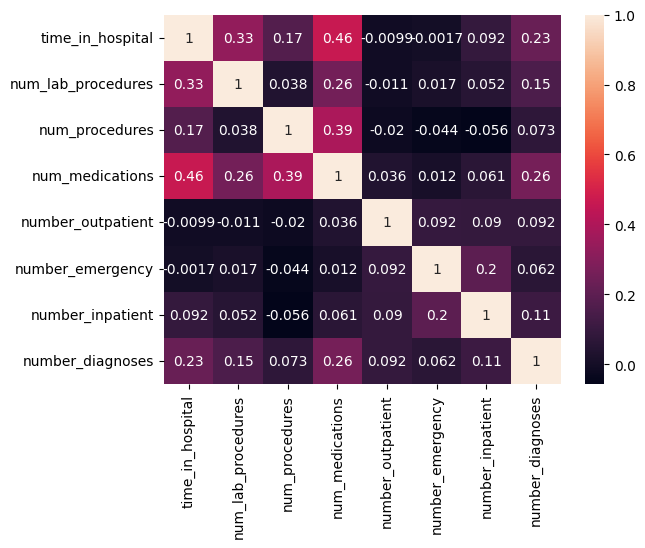

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Handling OUTLIERS**

In [ ]:
num=['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

checking variance inflation factor before treating for outliers

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data[num].values,i) for i in range(data[num].shape[1])]
vif['feature']=data[num].columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
7,7.263709,number_diagnoses
3,7.058314,num_medications
1,5.854436,num_lab_procedures
0,4.264446,time_in_hospital
2,1.965931,num_procedures
6,1.299717,number_inpatient
4,1.102366,number_outpatient
5,1.094146,number_emergency


There is no high multicollinearity between numerical features

Also it is better to club the previous years outpatient, inpatient and emergency vists into a new variable and drop the columns after joining.

In [ ]:
data['preceding_year_visits']=data['number_outpatient']+data['number_emergency']+data['number_inpatient']

In [ ]:
# Dropping ‘number_outpatient’, ‘number_emergency’, ‘number_inpatient’
data = data.drop(columns=['number_outpatient', 'number_emergency','number_inpatient'])

**Number of diagnoses**

In [ ]:
data['number_diagnoses'].value_counts()

number_diagnoses
9     31835
5      8518
6      7243
7      7093
8      7028
4      4121
3      2165
2       809
1       186
16       32
13       13
10       10
11        7
15        7
12        5
14        4
Name: count, dtype: int64

In [ ]:
data['number_diagnoses'].mode()

0    9
Name: number_diagnoses, dtype: int64

For number of diagnoses greater than 9 , we replace with 9 which is the mode

In [ ]:
data.number_diagnoses = data.number_diagnoses.replace([10,11,12,13,13.5,14,15,16],9)

List of new numerical columns

In [ ]:
num_cols = ['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
      'preceding_year_visits','number_diagnoses']

To check for skewness and outliers

Highly skewed data and hence using IQR to handle the outliers.

Only **num_lab_procedures, num_medications and preceeding_year_vists** will be treated for outliers as it has many outliers.

The other numerical features have fewer outliers and may be relevant to data and hence not treating for outliers.

In [ ]:
num_cols_out= data[['num_lab_procedures', 'num_medications',
      'preceding_year_visits']]

Using IQR method

In [ ]:
for j in num_cols_out:
    Q1=np.percentile(data[j],25,method='midpoint')
    Q2=np.percentile(data[j],50,method='midpoint')
    Q3=np.percentile(data[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR

    outliers = []
    for h in data[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    data[j]=data[j].clip(lower=low_lim,upper=up_lim)

Outliers are handled

**Medications Administered**

Citoglipton and Examide were not prescribed and hence dropping both the columns

In [ ]:
data.drop(['citoglipton','examide'],axis=1,inplace=True)

**Encoding the Target Feature**

Target Variable : Readmitted

This column our target feature. It is about "days to inpatient readmission"

If the patient was readmitted in less than 30 days "<30"

if the patient was readmitted in more than 30 days ">30"

If there is no record -  "NO"

We decided to reduce these values to two and map them according to the following rule;

NO -> 0

<30 and >30 -> 1

For a binary classification : Target variable is also assigned binary values

In [ ]:
data['readmitted'].value_counts()

readmitted
NO     52009
>30    13884
<30     3183
Name: count, dtype: int64

In [ ]:
data['readmitted'].replace({'NO':0,'<30':1,'>30':1},inplace=True)

In [ ]:
data['readmitted'].value_counts()

readmitted
0    52009
1    17067
Name: count, dtype: int64

**Check for multi-collinearity of numerical features** after handling outliers

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data[num_cols].values,i) for i in range(data[num_cols].shape[1])]
vif['feature']=data[num_cols].columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
3,8.006070,num_medications
5,7.907742,number_diagnoses
1,5.880711,num_lab_procedures
0,4.254056,time_in_hospital
2,1.941247,num_procedures
4,1.570683,preceding_year_visits


Since Variation Inflation Factor (VIF) is less than 10 ie.there is no high multicollinearity between features

**To check for statistical significance using Chi-Square and Anova one-way**

Chi-square for catergorical features and Anova on-way for numerical features

In [ ]:
#Statistical Tests (Chi Square and Anova)
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
p_val = []
sig = []
for i in data.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(data[data['readmitted'] == 0][i], data[data['readmitted'] == 1][i])
    else:
        ct = pd.crosstab(data[i], data['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : data.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

,columns,p_value,significance
38,preceding_year_visits,0.000000e+00,Significant
37,readmitted,0.000000e+00,Significant
11,number_diagnoses,9.601178e-226,Significant
7,num_lab_procedures,7.851715e-139,Significant
4,discharge_disposition_id,9.603091e-137,Significant
5,admission_source_id,8.320790e-87,Significant
3,admission_type_id,4.345554e-59,Significant
9,num_medications,1.096421e-56,Significant
2,age,2.689435e-50,Significant
0,race,1.713377e-45,Significant


In [ ]:
sig_cols = stats_df[stats_df['significance'] == 'Significant']['columns'].reset_index(drop = True)
insig_cols = stats_df[stats_df['significance'] == 'Insignificant']['columns'].reset_index(drop = True)
print('Statiscally significant features are :','\n')
print(sig_cols)
print('Statiscally insignificant features are :','\n')
print(insig_cols)

Statiscally significant features are : 

0                         race
1                          age
2            admission_type_id
3     discharge_disposition_id
4          admission_source_id
5             time_in_hospital
6           num_lab_procedures
7               num_procedures
8              num_medications
9                       diag_1
10            number_diagnoses
11               max_glu_serum
12                   A1Cresult
13                   metformin
14                 repaglinide
15                 glimepiride
16                   glipizide
17                pioglitazone
18               rosiglitazone
19                    acarbose
20                     insulin
21                      change
22                 diabetesMed
23                  readmitted
24       preceding_year_visits
Name: columns, dtype: object
Statiscally insignificant features are : 

0                       gender
1                  nateglinide
2               chlorpropamide
3                ac

Will drop the insignificant medications as listed above

insignificant_meds = nateglinide,
               chlorpropamide, miglitol,
                  glimepiride,
                acetohexamide,
                    glyburide,
                  tolbutamide,
                 troglitazone,
                   tolazamide,
          glyburide-metformin,
          glipizide-metformin,
    glimepiride-pioglitazone,
     metformin-rosiglitazone,
      metformin-pioglitazone

In [ ]:
data.drop(['nateglinide', 'chlorpropamide','gender',
       'acetohexamide', 'tolbutamide','miglitol','glyburide',
       'troglitazone','tolazamide',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69076 entries, 0 to 101765
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      69076 non-null  object 
 1   age                       69076 non-null  object 
 2   admission_type_id         69076 non-null  object 
 3   discharge_disposition_id  69076 non-null  object 
 4   admission_source_id       69076 non-null  object 
 5   time_in_hospital          69076 non-null  int64  
 6   num_lab_procedures        69076 non-null  int64  
 7   num_procedures            69076 non-null  int64  
 8   num_medications           69076 non-null  int64  
 9   diag_1                    69076 non-null  object 
 10  number_diagnoses          69076 non-null  int64  
 11  max_glu_serum             69076 non-null  object 
 12  A1Cresult                 69076 non-null  object 
 13  metformin                 69076 non-null  object 
 14  repaglinid

**Dataset reduced to 69076 rows and 25 features**


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data.columns

Index(['race', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glimepiride',
       'glipizide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'change', 'diabetesMed', 'readmitted', 'preceding_year_visits'],
      dtype='object')

In [ ]:
cat_cols=['race','age','admission_type_id','discharge_disposition_id', 'admission_source_id','diag_1','metformin',
       'repaglinide', 'glipizide', 'pioglitazone','glimepiride',
       'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed']

In [ ]:
# Fit and transform categorical columns
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 2)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 3)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 1)

data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 2)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 3)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 1)

In [ ]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
race,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0
age,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,...,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0
admission_type_id,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
discharge_disposition_id,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0
admission_source_id,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
time_in_hospital,1.0,3.0,2.0,2.0,1.0,3.0,4.0,5.0,13.0,12.0,...,2.0,5.0,5.0,1.0,6.0,3.0,5.0,1.0,10.0,6.0
num_lab_procedures,41.0,59.0,11.0,44.0,51.0,31.0,70.0,73.0,68.0,33.0,...,46.0,21.0,76.0,1.0,45.0,51.0,33.0,53.0,45.0,13.0
num_procedures,0.0,0.0,5.0,1.0,0.0,6.0,1.0,0.0,2.0,3.0,...,6.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,3.0
num_medications,1.0,18.0,13.0,16.0,8.0,16.0,21.0,12.0,28.0,18.0,...,17.0,16.0,22.0,15.0,25.0,16.0,18.0,9.0,21.0,3.0
diag_1,1.0,7.0,7.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,...,4.0,8.0,7.0,0.0,7.0,1.0,2.0,7.0,4.0,2.0


In [ ]:
data['max_glu_serum'].value_counts()

max_glu_serum
0    65807
1     1698
2      917
3      654
Name: count, dtype: int64

In [ ]:
data['A1Cresult'].value_counts()

A1Cresult
0    56875
3     5796
1     3680
2     2725
Name: count, dtype: int64

Encoding done and ready for modelling

In [ ]:
data['readmitted'].value_counts()

readmitted
0    52009
1    17067
Name: count, dtype: int64

In [ ]:
for i in cat_cols:
  print('value count in',data[i].value_counts())


value count in race
2    51649
0    12473
4     2972
3     1484
1      498
Name: count, dtype: int64
value count in age
3    32891
2    18826
4    12948
1     3737
0      674
Name: count, dtype: int64
value count in admission_type_id
1    48287
0    13615
2     7174
Name: count, dtype: int64
value count in discharge_disposition_id
0    43397
4    13775
1     8531
3     2962
2      411
Name: count, dtype: int64
value count in admission_source_id
0    37238
2    21936
3     4992
1     4910
Name: count, dtype: int64
value count in diag_1
0    20596
7    12365
8     9386
2     6457
1     5601
4     4854
5     3867
3     3520
6     2430
Name: count, dtype: int64
value count in metformin
1    54661
2    13195
3      794
0      426
Name: count, dtype: int64
value count in repaglinide
1    68127
2      841
3       75
0       33
Name: count, dtype: int64
value count in glipizide
1    60425
2     7766
3      546
0      339
Name: count, dtype: int64
value count in pioglitazone
1    63940
2     48

**Data Split**

In [ ]:
X=data.drop('readmitted',axis=True)
y=data['readmitted']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [ ]:
X_test.T

,78304,2612,9271,84405,95288,23575,80076,12974,46383,70814,...,3243,47737,43728,96067,73985,66515,80019,74345,99998,17220
race,2.0,2.0,2.0,0.0,4.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
age,4.0,4.0,3.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0,...,3.0,1.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,1.0
admission_type_id,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,...,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
discharge_disposition_id,4.0,4.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,4.0
admission_source_id,0.0,3.0,0.0,0.0,3.0,3.0,0.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0
time_in_hospital,5.0,5.0,3.0,3.0,4.0,14.0,2.0,5.0,3.0,4.0,...,5.0,5.0,3.0,5.0,4.0,3.0,9.0,7.0,5.0,1.0
num_lab_procedures,68.0,47.0,35.0,51.0,22.0,65.0,44.0,63.0,43.0,62.0,...,25.0,42.0,57.0,61.0,18.0,4.0,51.0,58.0,43.0,56.0
num_procedures,1.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
num_medications,22.0,10.0,9.0,7.0,27.0,18.0,9.0,15.0,22.0,13.0,...,7.0,8.0,15.0,8.0,14.0,11.0,19.0,17.0,17.0,11.0
diag_1,0.0,1.0,7.0,1.0,0.0,7.0,7.0,8.0,5.0,7.0,...,2.0,8.0,8.0,2.0,3.0,5.0,7.0,2.0,5.0,4.0


Standardizing using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

x_train=pd.DataFrame(x_train,columns=X.columns)
x_test=pd.DataFrame(x_test,columns=X.columns)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score
rfc=RandomForestClassifier(n_estimators=100,max_depth=11,criterion='gini',min_samples_split=5,random_state=42)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("recall :",recall_score(y_test,y_pred))
print("F1 :",f1_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))
print("Confusion matrix : ",confusion_matrix(y_test,y_pred))

Accuracy :  0.753329473074696
recall : 0.04176267281105991
F1 : 0.07842076798269335
Precision : 0.6415929203539823
Confusion matrix :  [[10263    81]
 [ 3327   145]]


Using Fine Tuned Random Forest Classifier to predict the Readmission of Diabetic Patients

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
prediction=rfc.predict([[2,4,1,0,0,3,58,0,18,0,9,0,2,1,1,2,1,1,1,0,0,0,1,1]])
print(prediction[0])

0


In [ ]:
prediction=rfc.predict([[2,1,3,1,1,0,4,2,1,11,4,6,0,0,2,1,1,1,1,0,1,1,1,1]])
print(prediction[0])

0


In [ ]:
prediction=rfc.predict([[4,3,1,0,0,2,46,6,17,4,9,0,0,1,1,1,1,1,1,1,2,1,1,2.5]])
print(prediction[0])

1


In [ ]:
prediction=rfc.predict([[0,1,1,0,0,3,51,0,7,1,5,0,0,1,1,1,1,1,11,1,0,0,1,0]])
print(prediction[0])

0


In [ ]:
prediction=rfc.predict([[2,3,1,1,2,9,2,0,17,0,9,0,0,1,1,1,2,1,1,1,1,1,1,2]])
print(prediction[0])

0


In [ ]:
prediction=rfc.predict([[2,3,2,0,1,13,96,4,35,8,9,0,0,1,1,1,1,1,1,1,2,1,1,2.5]])
print(prediction[0])

1


In [ ]:
# import pickle to write the predicted model to load into VS Code as model_file
import pickle
with open('readmission.pkl','wb') as model_file:
  pickle.dump(rfc,model_file)

In [ ]:
diabetic=pickle.load(open('readmission.pkl','rb'))  # open in a new variable, this code will be used in VS Code to read the pickle file